# Import libraries

In [1]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
# nltk.download()

# Regular Expressions (regex) tutorial

A regular expression, regex or regexp (sometimes called a rational expression) is a sequence of characters that define a search pattern. Usually such patterns are used by string searching algorithms for “find” or “find and replace” operations on strings, or for input validation. It is a technique developed in theoretical computer science and formal language theory.

— Wikipedia

In [3]:
import re

Here are the sample strings we'll be using.

In [5]:
lowercase_alphabet = 'abcdefghijklmnopqrstuvwxyz'
uppercase_alphabet = lowercase_alphabet.upper()
numbers = '1234567890'
website = 'www.google.com'
sentence = 'The Quick Brown Fox Jumped Over The Lazy Dog'
phone_numbers = """123-456-7890
                    987.654.321
                    234-567-8901
                    654.321.987
                    345-678-9012
                    321.654.978
                    456-789-0123
                    abc-efg-hijk
                """
special_characters = '[\^$.|?**+()'

## Using explicit characters

There are different methods of string search using re: `re.match()`, `re.search()`, and `re.findall()`. Here are the differences between the methods.

`re.match()` - finds match if it occurs at the start of the string

`re.search()` - similar to re.match() but it doesn't limit matches to be at the beginning of the string

`re.findall()` - helps to get a list of all matching patterns. It searches from start or end of the given string.

When searching a pattern, it is recommended to use re.findall() always, since it works like both `re.search()` and `re.match()`.

In [5]:
# Using re.match()
result = re.match('abc', lowercase_alphabet)
print(result.group(0))

abc


In [6]:
# Using re.search()
result = re.search('xyz', lowercase_alphabet)
print(result.group(0))

xyz


In [7]:
# Using re.findall()
re.findall('abc', lowercase_alphabet)

['abc']

In [8]:
re.findall('ABC', uppercase_alphabet)

['ABC']

In [9]:
re.findall('abc',uppercase_alphabet)

[]

## Using literal characters

In order to match any literal characters(except the special characters), you have to introduce a backslash '\\' followed by the character you'd like to select.

In [10]:
re.findall('www\.google\.com', website)

['www.google.com']

In [11]:
re.findall('\$', special_characters)

['$']

In [12]:
re.findall('$', special_characters)

['']

In [13]:
re.findall('\|', special_characters)

['|']

If you want to get specific attributes of a matched token, you can use `re.finditer()` and store the attribute (span, group, etc.) in a list.

In [14]:
txt = 'The patient has Type-2 diabetes. His family has a history of diabetes.'
for match in re.finditer('diabetes', txt):
    print(match.span(), match.group())

(23, 31) diabetes
(61, 69) diabetes


## Pattern matching

<img src="regex_notes.png">

> *Cheatsheet tables from: regexr.com*

Let's say we want to match every word from our sentence and put it in a list.

In [15]:
sentence

'The Quick Brown Fox Jumped Over The Lazy Dog'

In [16]:
re.findall('.', numbers)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']

In [17]:
re.findall('\w{1,}', sentence)

['The', 'Quick', 'Brown', 'Fox', 'Jumped', 'Over', 'The', 'Lazy', 'Dog']

> Syntax:
<br><br> `\w` = any word
<br> `{1,}` = 1 or more characters
<br><br> `\w{1,}` - match [any word] with [1 or more characters] and put each word matched in a list.

What if we want to select phone numbers from `phone_numbers` that follow the format `xxx-xxx-xxxx` where x's are all digits?

In [7]:
print(phone_numbers)

123-456-7890
                    987.654.321
                    234-567-8901
                    654.321.987
                    345-678-9012
                    321.654.978
                    456-789-0123
                    abc-efg-hijk
                


In [18]:
re.findall('\d{3}\-\d{3}\-\d{4}', phone_numbers)

['123-456-7890', '234-567-8901', '345-678-9012', '456-789-0123']

> Syntax:
<br><br> `\d` = any digit
<br> `{n}` = exactly *n* number of characters ({3}: exactly 3 and {4}: exactly 4)
<br> `\-` = select hyphen
<br><br> `\d{3}\-\d{3}\-\d{4}` - match [any digit] with [exactly three characters] followed by [hyphen] match [any digit] with [exactly three characters] followed by [hyphen] match [any digit] with [exactly four characters]

## Disjunctions

You can match with a set of characters by enclosing the options in `square braces []`.

In [19]:
txt = "I'm afraid you have Type 2 Diabetes. Does your family have a history of diabetes?"
re.findall('[Dd]iabetes', txt)

['Diabetes', 'diabetes']

You can also specify a range in the square braces!

In [20]:
websites = """www.google.com
            www.slideshare.net
            www.usa.gov
            """
re.findall('w{3}\.\w{1,}\.[a-z]{3}', websites)

['www.google.com', 'www.slideshare.net', 'www.usa.gov']

You can also use pipes `|` to do an either-or match.

In [21]:
txt = 'Pembrolizumab plus axitinib versus sunitinib for Advanced Renal-Cell Carcinoma'
re.findall('[Pp]embrolizumab|[Aa]xitinib', txt)

['Pembrolizumab', 'axitinib']

We can also set characters to be optional! This can be done using the `!` symbol.

## Negation

The carat `^` sumbol means negation only when it's the first character in the square brackets.

In [22]:
txt = 'She had 2 two kittens, Olivia and Meredith.'
re.findall('[^A-Za-z\s]', txt)

['2', ',', '.']

In [25]:
txt = '2020 was not a good year'
re.findall('[^0-9]+', txt)

[' was not a good year']

## Possible characters

In [26]:
txt = "I'm not sure if he drove yesterday. But he'll drive to school today."
re.findall('dr.ve', txt)

['drove', 'drive']

## Anchors

In [27]:
txt = "There are no people over there."
re.findall('^[Tt]here', txt)

['There']

In [28]:
txt = "There are no people over there."
re.findall('^there', txt)

[]

In [29]:
txt = "It's not a real sentence without a puntuation mark!"
re.findall('\!$', txt)

['!']

In [30]:
txt = "!It's not a real sentence without a puntuation mark"
re.findall('\!$', txt)

[]

# Sentiment Analysis

I used the US Amazon Reviews of Wireless devices dataset. You can download the dataset by clicking <a href="https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Wireless_v1_00.tsv.gz">here</a>.

You can also click <a href="https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt">here</a> to see all the amazon review datasets you can use to try your own sentiment analysis!

## Data preparation

In [8]:
dfAmazon = pd.read_csv('amazon_reviews_us_Wireless_v1_00.tsv.gz', sep='\t', compression='gzip', error_bad_lines=False)

b'Skipping line 51163: expected 15 fields, saw 22\n'
b'Skipping line 77018: expected 15 fields, saw 22\nSkipping line 97528: expected 15 fields, saw 22\n'
b'Skipping line 145503: expected 15 fields, saw 22\nSkipping line 172172: expected 15 fields, saw 22\nSkipping line 185136: expected 15 fields, saw 22\nSkipping line 187592: expected 15 fields, saw 22\n'
b'Skipping line 222158: expected 15 fields, saw 22\nSkipping line 232048: expected 15 fields, saw 22\nSkipping line 232320: expected 15 fields, saw 22\nSkipping line 234653: expected 15 fields, saw 22\nSkipping line 257210: expected 15 fields, saw 22\nSkipping line 261368: expected 15 fields, saw 22\n'
b'Skipping line 262843: expected 15 fields, saw 22\nSkipping line 274082: expected 15 fields, saw 22\nSkipping line 276172: expected 15 fields, saw 22\nSkipping line 327076: expected 15 fields, saw 22\n'
b'Skipping line 328675: expected 15 fields, saw 22\nSkipping line 366744: expected 15 fields, saw 22\nSkipping line 380897: expected 

b'Skipping line 3350797: expected 15 fields, saw 22\nSkipping line 3353129: expected 15 fields, saw 22\nSkipping line 3359991: expected 15 fields, saw 22\nSkipping line 3374754: expected 15 fields, saw 22\nSkipping line 3384256: expected 15 fields, saw 22\n'
b'Skipping line 3466921: expected 15 fields, saw 22\n'
b'Skipping line 3489262: expected 15 fields, saw 22\nSkipping line 3495576: expected 15 fields, saw 22\nSkipping line 3523962: expected 15 fields, saw 22\nSkipping line 3529611: expected 15 fields, saw 22\nSkipping line 3531020: expected 15 fields, saw 22\nSkipping line 3536942: expected 15 fields, saw 22\n'
b'Skipping line 3541414: expected 15 fields, saw 22\nSkipping line 3552928: expected 15 fields, saw 22\nSkipping line 3586921: expected 15 fields, saw 22\nSkipping line 3599085: expected 15 fields, saw 22\n'
b'Skipping line 3613803: expected 15 fields, saw 22\nSkipping line 3615552: expected 15 fields, saw 22\nSkipping line 3617751: expected 15 fields, saw 22\nSkipping line

In [9]:
dfAmazon.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,16414143,R3W4P9UBGNGH1U,B00YL0EKWE,852431543,LG G4 Case Hard Transparent Slim Clear Cover f...,Wireless,2,1.0,3.0,N,Y,"Looks good, functions meh",2 issues - Once I turned on the circle apps ...,2015-08-31
1,US,50800750,R15V54KBMTQWAY,B00XK95RPQ,516894650,Selfie Stick Fiblastiq&trade; Extendable Wirel...,Wireless,4,0.0,0.0,N,N,A fun little gadget,"I’m embarrassed to admit that until recently, ...",2015-08-31
2,US,15184378,RY8I449HNXSVF,B00SXRXUKO,984297154,Tribe AB40 Water Resistant Sports Armband with...,Wireless,5,0.0,0.0,N,Y,Five Stars,Fits iPhone 6 well,2015-08-31
3,US,10203548,R18TLJYCKJFLSR,B009V5X1CE,279912704,RAVPower® Element 10400mAh External Battery US...,Wireless,5,0.0,0.0,N,Y,Great charger,Great charger. I easily get 3+ charges on a S...,2015-08-31
4,US,488280,R1NK26SWS53B8Q,B00D93OVF0,662791300,Fosmon Micro USB Value Pack Bundle for Samsung...,Wireless,5,0.0,0.0,N,Y,Five Stars,Great for the price :-),2015-08-31


In [10]:
dfAmazon.shape

(8991589, 15)

In [11]:
dfAmazon.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating          106
helpful_votes        110
total_votes          110
vine                 110
verified_purchase    110
review_headline      200
review_body          648
review_date          151
dtype: int64

In [12]:
dfAmazon.dropna(subset=['star_rating', 'review_body'], inplace=True)

In [13]:
dfAmazon.isnull().sum()

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      89
review_body           0
review_date          41
dtype: int64

In [14]:
amazonReviews = dfAmazon[['star_rating', 'review_body']].copy()

In [15]:
amazonReviews.tail()

,star_rating,review_body
8991584,4,We train search and rescue dogs in Colorado an...
8991585,5,I have had the BC245XLT for almost a week now....
8991586,4,I brought my Gramin GPS II last month. The fe...
8991587,5,"I made a 4 day, 3 night solo hike in Big Bend ..."
8991588,4,"The Garmin GPS II, II Plus, and III are all ex..."


## Preprocessing

In [16]:
sample_text = amazonReviews.loc[8991584]['review_body']

print(sample_text)

We train search and rescue dogs in Colorado and map griding is extremely important to what we do.  We use this little puppy on a regular basis and it is quite accurate.<br />The down side is as already mentioned, low cell  life.  So carry an extra cell and you should be fine.


In [17]:
def preprocess(sample_text):
    sample_text = sample_text.lower()      # Normalize casing
    sample_text = re.sub(r'\d+', '', sample_text)    # Replaces any digit occurence with a space (' ') 
    sample_text = sample_text.translate(str.maketrans('', '', string.punctuation))   # Strips punctuations
    sample_text = sample_text.strip()    # Trims whitespace at the start and end
    return sample_text

In [18]:
processed_text = preprocess(sample_text)
print(processed_text)

we train search and rescue dogs in colorado and map griding is extremely important to what we do  we use this little puppy on a regular basis and it is quite accuratebr the down side is as already mentioned low cell  life  so carry an extra cell and you should be fine


## Tokenization

In [19]:
# Sentence Tokenization
sent_token = nltk.tokenize.sent_tokenize(sample_text)
sent_token

['We train search and rescue dogs in Colorado and map griding is extremely important to what we do.',
 'We use this little puppy on a regular basis and it is quite accurate.<br />The down side is as already mentioned, low cell  life.',
 'So carry an extra cell and you should be fine.']

In [20]:
# Word tokenization
word_token = nltk.tokenize.word_tokenize(processed_text)
word_token

['we',
 'train',
 'search',
 'and',
 'rescue',
 'dogs',
 'in',
 'colorado',
 'and',
 'map',
 'griding',
 'is',
 'extremely',
 'important',
 'to',
 'what',
 'we',
 'do',
 'we',
 'use',
 'this',
 'little',
 'puppy',
 'on',
 'a',
 'regular',
 'basis',
 'and',
 'it',
 'is',
 'quite',
 'accuratebr',
 'the',
 'down',
 'side',
 'is',
 'as',
 'already',
 'mentioned',
 'low',
 'cell',
 'life',
 'so',
 'carry',
 'an',
 'extra',
 'cell',
 'and',
 'you',
 'should',
 'be',
 'fine']

## Sample analysis

In [21]:
# Get the frequency distribution
fdist = nltk.probability.FreqDist(word_token)

In [22]:
fdist.most_common(2)

[('and', 4), ('we', 3)]

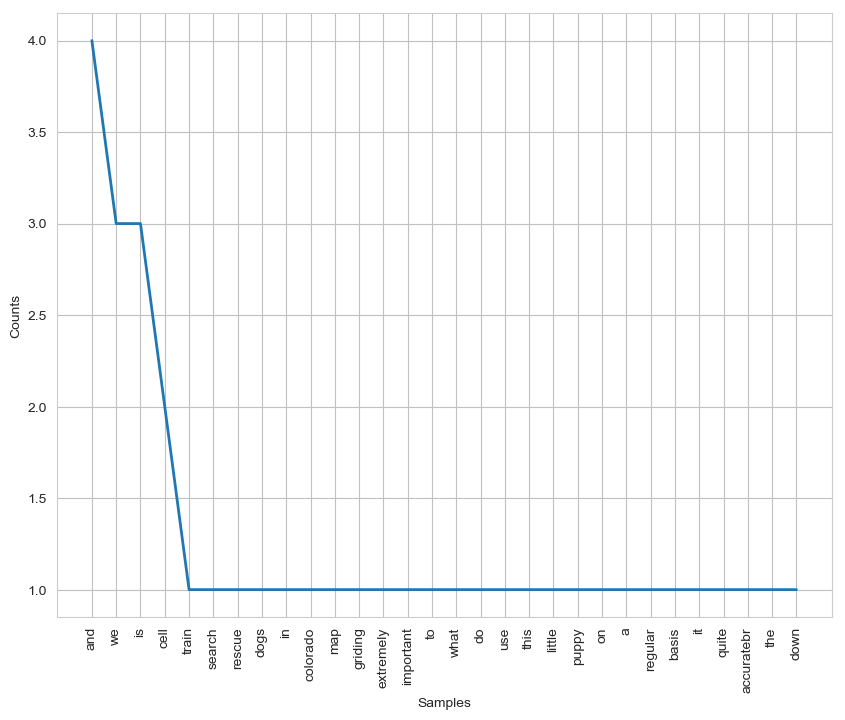

In [24]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 100)
fdist.plot(30, cumulative = False)
plt.show()

In [26]:
# Stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
print(stop_words)

{'of', 'while', 'too', 'him', 'have', "you'd", "didn't", 'wouldn', 'why', 'before', 'both', "couldn't", 'there', 'your', "you'll", 'needn', 'above', 'it', 'you', 'only', 'very', 'shan', 'doing', 'from', 'couldn', 'and', 'a', 'between', 'than', 'are', 'be', "hadn't", 'aren', 'with', 'again', "that'll", 'doesn', 'didn', 'will', 'its', 'when', 'y', 'most', 'if', 'yourself', 't', 'now', 'they', 'which', 'just', 'few', "won't", "wouldn't", 'at', 'hadn', 'wasn', 'after', 'an', 'ma', 'where', 'but', 'shouldn', 'has', 'yours', 'her', 'mustn', 'own', 'been', "aren't", 'their', 'each', "should've", "isn't", 'under', "shan't", 'ours', 'as', "mustn't", 'such', "it's", 'any', 'through', "mightn't", 'these', 'so', 'all', 'over', 'won', 'against', 'whom', 'the', 'who', 'them', 'to', 'haven', 'mightn', 'then', 'she', "you're", "you've", 'for', 'was', 'herself', 'no', 'what', 're', "weren't", 'ourselves', 'or', 'can', 'we', 'being', "don't", 'here', 'o', 'ain', 'in', 'weren', 'itself', 'do', 'until', '

In [27]:
sent_filtered = [w for w in word_token if w not in stop_words]

print('Tokenized Sentence:', word_token, '\n')
print('Filtered Sentence:', sent_filtered)

Tokenized Sentence: ['we', 'train', 'search', 'and', 'rescue', 'dogs', 'in', 'colorado', 'and', 'map', 'griding', 'is', 'extremely', 'important', 'to', 'what', 'we', 'do', 'we', 'use', 'this', 'little', 'puppy', 'on', 'a', 'regular', 'basis', 'and', 'it', 'is', 'quite', 'accuratebr', 'the', 'down', 'side', 'is', 'as', 'already', 'mentioned', 'low', 'cell', 'life', 'so', 'carry', 'an', 'extra', 'cell', 'and', 'you', 'should', 'be', 'fine'] 

Filtered Sentence: ['train', 'search', 'rescue', 'dogs', 'colorado', 'map', 'griding', 'extremely', 'important', 'use', 'little', 'puppy', 'regular', 'basis', 'quite', 'accuratebr', 'side', 'already', 'mentioned', 'low', 'cell', 'life', 'carry', 'extra', 'cell', 'fine']


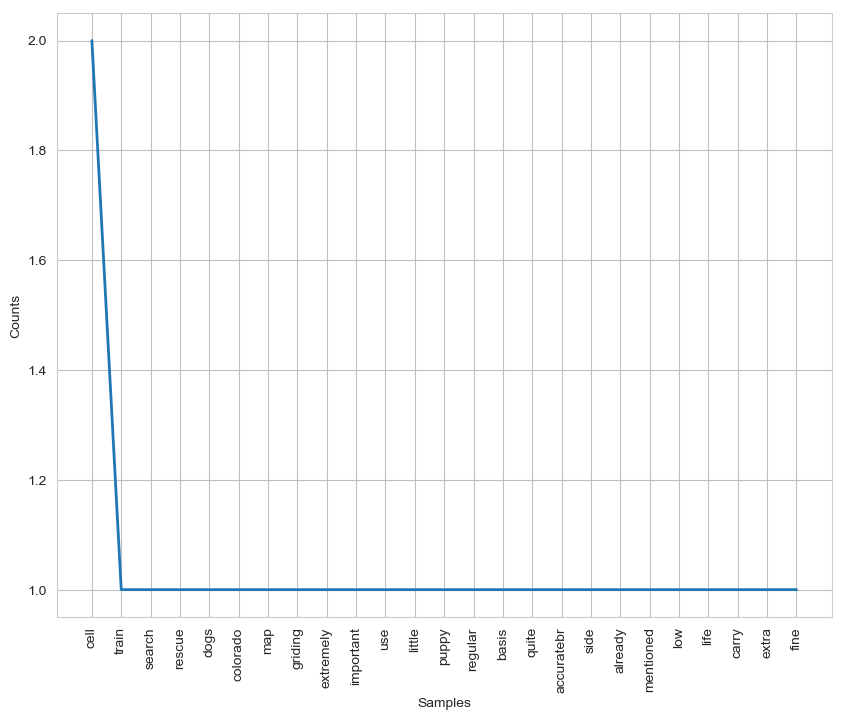

In [28]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 100)
fdist = nltk.probability.FreqDist(sent_filtered)

fdist.plot(30, cumulative=False)
plt.show()

## Sentiment analysis with Vader

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [30]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [54]:
df = pd.DataFrame({'Sentence': sent_token})
df_sentiment = pd.DataFrame()

for sent in sent_token:
    temp = pd.DataFrame([analyser.polarity_scores(sent)])
    df_sentiment = pd.concat((df_sentiment, temp), axis = 0)
    
df = pd.concat((df, df_sentiment.reset_index().drop('index', axis = 1)), axis = 1)

In [59]:
df.style.set_properties(**{'max-width': '1000px', 'font-size': '9pt'})\

,Sentence,compound,neg,neu,pos
0,We train search and rescue dogs in Colorado and map griding is extremely important to what we do.,0.659,0,0.748,0.252
1,"We use this little puppy on a regular basis and it is quite accurate.The down side is as already mentioned, low cell life.",-0.2732,0.084,0.916,0
2,So carry an extra cell and you should be fine.,0.2023,0,0.833,0.167


In [65]:
df['compound'].mean()

0.19603333333333336

# Translation

In [116]:
import jieba.posseg as pseg
import jieba
import jieba.analyse

## Load the data

In [114]:
temp = pd.read_csv('Bi-Spoken.txt', sep="\n", header=None)[0:100]
df_translate = pd.DataFrame(index=range(0,int(len(temp)/2)))

df_translate = temp.iloc[1::2].reset_index().drop('index', axis = 1)
df_translate = pd.concat((df_translate, temp.iloc[::2].reset_index().drop('index', axis = 1)), axis = 1)
df_translate.columns = ['Chinese', 'English']

In [117]:
df_translate.head()

,Chinese,English
0,你认为你的书面英语和口语熟练程度如何？,How do you think of your proficiency in writte...
1,她的英语口语不是十分好，可她的意思可以理解得很清楚。,"Her spoken English is not very good, but her m..."
2,天空中飘着几朵云，但阳光灿烂。,"There are some clouds in the sky,but the sun i..."
3,我和妻子沿河岸走着。,My wife and I are walking along the banks of t...
4,萨姆：你打算如何处理那共瓶？,"SAM: What are you going to do with that vase, ..."


## Loading word embeddings from fasttext

In [3]:
def load_vectors(embedding_path):
    fin = io.open(embedding_path + '.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    print(n,d)
    words = []
    vectors = np.zeros((n,d))
    data = {}
    for idx, line in enumerate(fin):
        tokens = line.rstrip().split(' ')
        words.append(tokens[0])
        vectors[idx,:] += [float(val) for val in tokens[1:]]
#         data[tokens[0]] = map(float, tokens[1:])
        if idx % 10000 == 0:
            print('.', end = ' ')
    np.save(embedding_path + ".npy", vectors)
    with open(embedding_path + ".txt", 'w', encoding='utf-8') as output:
        for row in words:
            output.write(row + '\n')
    return words, vectors

In [11]:
en_words, en_tokens = load_vectors('cc.en.300')

2000000 300
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [45]:
zh_words, zh_tokens = load_vectors('cc.zh.300')

2000000 300
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [120]:
import codecs
def load_word_emb_binary(embedding_file_name_w_o_suffix):
    print("Loading binary word embedding from {0}.txt and {0}.npy".format(embedding_file_name_w_o_suffix))

    with codecs.open(embedding_file_name_w_o_suffix + '.txt', 'r', 'utf-8') as f_in:
        index2word = [line.strip() for line in f_in]

    wv = np.load(embedding_file_name_w_o_suffix + '.npy')
    word_embedding_map = {}
    for i, w in enumerate(index2word):
        word_embedding_map[w] = wv[i]

    return word_embedding_map

In [121]:
vec_en = load_word_emb_binary('cc.en.300')

Loading binary word embedding from cc.en.300.txt and cc.en.300.npy


In [122]:
vec_zh = load_word_emb_binary('cc.zh.300')

Loading binary word embedding from cc.zh.300.txt and cc.zh.300.npy


In [123]:
# Load embedding file
zh_tokens = np.load('cc.zh.300.npy')
en_tokens = np.load('cc.en.300.npy')

In [124]:
df_en = pd.DataFrame(vec_en.items(), columns=['words', 'embedding']).set_index('words')
df_zh = pd.DataFrame(vec_zh.items(), columns=['words', 'embedding']).set_index('words')

In [125]:
df_en.head()

,embedding
words,
",","[0.125, -0.1079, 0.0245, -0.2529, 0.1057, -0.0..."
the,"[-0.0517, 0.074, -0.0131, 0.0447, -0.0343, 0.0..."
.,"[0.0342, -0.0801, 0.1162, -0.3968, -0.0147, -0..."
and,"[0.0082, -0.0899, 0.0265, -0.0086, -0.0609, 0...."
to,"[0.0047, 0.0281, -0.0296, -0.0108, -0.062, -0...."


In [126]:
df_zh.head()

,embedding
words,
，,"[0.008, 0.0336, 0.572, -0.1105, -0.02, 0.0195,..."
的,"[-0.0119, 0.051, 0.4397, -0.0427, -0.0501, -0...."
。,"[0.0093, 0.021, 0.7688, -0.0348, -0.0471, 0.05..."
</s>,"[-0.0112, -0.0688, 1.0076, 0.007, -0.03, -0.01..."
、,"[0.0658, 0.0075, 0.5058, 0.0821, -0.0212, 0.02..."


## Tokenize using Jieba

In [131]:
zh_tokenized = df_translate.Chinese.apply(lambda x: str(x)).apply(jieba.lcut_for_search)

In [132]:
zh_tokenized.head()

0    [你, 认为, 你, 的, 书面, 英语, 和, 口语, 熟练, 程度, 熟练程度, 如何, ？]
1    [她, 的, 英语, 口语, 英语口语, 不是, 十分, 好, ，, 可, 她, 的, 意思...
2              [天空, 中飘着, 几朵, 云, ，, 但, 阳光, 灿烂, 阳光灿烂, 。]
3                           [我, 和, 妻子, 沿, 河岸, 走, 着, 。]
4                       [萨姆, ：, 你, 打算, 如何, 处理, 那共瓶, ？]
Name: Chinese, dtype: object

In [133]:
zh_words = set(np.hstack(zh_tokenized))
zh_words

{' ',
 '.',
 '/',
 '1',
 '10',
 '15',
 '24',
 '3',
 '4',
 '41',
 '5',
 ':',
 '“',
 '”',
 '、',
 '。',
 '一',
 '一下',
 '一个',
 '一个月',
 '一只',
 '一周',
 '一家',
 '一本',
 '一起',
 '上',
 '上午',
 '上学',
 '上班',
 '上面',
 '下午',
 '下雨',
 '不',
 '不多',
 '不少',
 '不常',
 '不是',
 '不能',
 '世界',
 '东西',
 '东部',
 '两个',
 '个',
 '中飘着',
 '乔治',
 '乘',
 '也',
 '书面',
 '买',
 '了',
 '云',
 '人',
 '今天',
 '今天上午',
 '今晚',
 '他',
 '他们',
 '们',
 '伦敦',
 '伸进',
 '但',
 '但他却',
 '但是',
 '住',
 '住址',
 '作业',
 '你',
 '你们',
 '保持',
 '做作',
 '做作业',
 '先生',
 '入',
 '其他',
 '写',
 '准备',
 '几乎',
 '几天',
 '几朵',
 '则',
 '利风',
 '别开',
 '到',
 '前',
 '前天',
 '前年',
 '前门',
 '加里',
 '北部',
 '医生',
 '十分',
 '南部',
 '卡罗',
 '卡罗尔',
 '卧床',
 '去',
 '去年',
 '又',
 '口语',
 '只',
 '只有',
 '可',
 '可不',
 '可不是',
 '可以',
 '号',
 '吃',
 '吉姆',
 '吉尔',
 '同',
 '名字',
 '后天',
 '后面',
 '吗',
 '吧',
 '听',
 '呆',
 '告诉',
 '和',
 '咖啡',
 '唉',
 '售货',
 '售货员',
 '商店',
 '喝茶',
 '回',
 '回家',
 '因此',
 '国家',
 '国王',
 '图尔',
 '土豆',
 '在',
 '坐在',
 '处理',
 '大',
 '大利',
 '天上',
 '天气',
 '天空',
 '夫人',
 '她',
 '好',
 '如何',
 '妻子',
 '姓名',
 '威廉',
 '威廉斯',
 '孩子

In [137]:
# Get word embeddings of the words that exist in the dataset
df_zh = df_zh[df_zh.index.isin(zh_words)]
df_zh.head()

,embedding
words,
，,"[0.008, 0.0336, 0.572, -0.1105, -0.02, 0.0195,..."
的,"[-0.0119, 0.051, 0.4397, -0.0427, -0.0501, -0...."
。,"[0.0093, 0.021, 0.7688, -0.0348, -0.0471, 0.05..."
、,"[0.0658, 0.0075, 0.5058, 0.0821, -0.0212, 0.02..."
是,"[-0.0058, 0.0187, 0.5163, -0.0498, -0.0657, 0...."


## Tokenize using nltk

In [152]:
# Pre processing
def preprocess(sample_text):
    sample_text = sample_text.lower() #All lowercase
    sample_text = sample_text.strip() #Strip
    sample_text = re.sub(' +', ' ', sample_text) #Trim whitespace
    sample_text = sample_text.translate(str.maketrans("","", string.punctuation))
    sample_text = nltk.tokenize.word_tokenize(sample_text) #Word tokenizer
    sample_text = [i for i in sample_text if i!= ''] #Trim extra spaces
    return sample_text

In [154]:
en_tokenized = df_translate.English.apply(lambda x: preprocess(x))

In [156]:
en_tokenized.head()

0    [how, do, you, think, of, your, proficiency, i...
1    [her, spoken, english, is, not, very, good, bu...
2    [there, are, some, clouds, in, the, skybut, th...
3    [my, wife, and, i, are, walking, along, the, b...
4    [sam, what, are, you, going, to, do, with, tha...
Name: English, dtype: object

In [157]:
en_words = set(np.hstack(en_tokenized))
en_words

{'10',
 '24th',
 'a',
 'about',
 'address',
 'afraid',
 'after',
 'afternoon',
 'again',
 'agobut',
 'along',
 'already',
 'always',
 'am',
 'and',
 'any',
 'april',
 'are',
 'arrive',
 'as',
 'assistant',
 'at',
 'back',
 'bad',
 'banks',
 'be',
 'bed',
 'beef',
 'been',
 'before',
 'behind',
 'better',
 'billy',
 'blue',
 'bob',
 'boss',
 'but',
 'by',
 'can',
 'cant',
 'car',
 'cares',
 'carol',
 'cars',
 'carsamerican',
 'carsitalian',
 'case',
 'children',
 'clouds',
 'coffee',
 'cold',
 'coldmrwilliamsso',
 'come',
 'country',
 'day',
 'do',
 'doctor',
 'does',
 'doesnt',
 'doing',
 'dont',
 'door',
 'doubt',
 'dress',
 'drinks',
 'drive',
 'each',
 'east',
 'easy',
 'english',
 'enough',
 'evening',
 'every',
 'excuse',
 'fashion',
 'fifteenfive',
 'foot',
 'for',
 'fortyone',
 'four',
 'french',
 'front',
 'garage',
 'gary',
 'george',
 'german',
 'get',
 'go',
 'goes',
 'going',
 'good',
 'got',
 'green',
 'guy',
 'had',
 'hand',
 'handle',
 'has',
 'have',
 'havent',
 'he',
 

In [158]:
# Get word embeddings of the words that exist in the dataset
df_en = df_en[df_en.index.isin(en_words)]
df_en.head()

,embedding
words,
the,"[-0.0517, 0.074, -0.0131, 0.0447, -0.0343, 0.0..."
and,"[0.0082, -0.0899, 0.0265, -0.0086, -0.0609, 0...."
to,"[0.0047, 0.0281, -0.0296, -0.0108, -0.062, -0...."
of,"[-0.0001, -0.1877, -0.0711, -0.4632, 0.0002, 0..."
a,"[0.0876, -0.4959, -0.0499, -0.0937, -0.0472, -..."


## Align embeddings of chinese and english

In [164]:
# Create a dictionary of words: embeddings
vec_en = dict(zip(df_en.index, df_en.embedding))
vec_zh = dict(zip(df_zh.index, df_zh.embedding))

In [167]:
def normalized(a, axis=-1, order=2):
    """Utility function to normalize the rows of a numpy array."""
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

def make_training_matrices(source_dictionary, target_dictionary, bilingual_dictionary):
    """
    Source and target dictionaries are the FastVector objects of
    source/target languages. bilingual_dictionary is a list of 
    translation pair tuples [(source_word, target_word), ...].
    """
    source_matrix = []
    target_matrix = []

    for (source, target) in bilingual_dictionary:
        if source in source_dictionary and target in target_dictionary:
            source_matrix.append(source_dictionary[source])
            target_matrix.append(target_dictionary[target])

    # return training matrices
    return np.array(source_matrix), np.array(target_matrix)

def learn_transformation(source_matrix, target_matrix, normalize_vectors=True):
    """
    Source and target matrices are numpy arrays, shape
    (dictionary_length, embedding_dimension). These contain paired
    word vectors from the bilingual dictionary.
    """
    # optionally normalize the training vectors
    if normalize_vectors:
        source_matrix = normalized(source_matrix)
        target_matrix = normalized(target_matrix)

    # perform the SVD
    product = np.matmul(source_matrix.transpose(), target_matrix)
    U, s, V = np.linalg.svd(product)

    # return orthogonal transformation which aligns source language to the target
    return np.matmul(U, V)

In [168]:
bilingual_dictionary = pd.read_csv('zh-en.txt', sep=' ', header=None)
bilingual_dictionary = list(zip(bilingual_dictionary[0], bilingual_dictionary[1]))

# form the training matrices
source_matrix, target_matrix = make_training_matrices(
    vec_zh, vec_en, bilingual_dictionary)

# learn and apply the transformation
transform = learn_transformation(source_matrix, target_matrix)

In [173]:
transform = transform
# transform = np.loadtxt('zh.txt')

zh_arr = np.vstack(df_zh.embedding)
en_arr = np.vstack(df_en.embedding)

zh_arr = (zh_arr@transform)

df_zh['embedding'] = [arr for arr in zh_arr]
vec_zh = dict(zip(df_zh.index, zh_arr))

In [175]:
df_zh.head()

,embedding
words,
，,"[-0.07338314571982124, 0.03691271652186637, -0..."
的,"[-0.005431466050946035, -0.12197806339510826, ..."
。,"[-0.1157173307236048, -0.0003797898557479362, ..."
、,"[-0.0943732928806934, -0.02573807322035622, 0...."
是,"[-0.03546400068256213, 0.0009364660024190202, ..."


## Getting nearest neighbor

In [176]:
def get_w2v(sentence, model):
    """
    :param sentence: inputs a single sentences whose word embedding is to be extracted.
    :param model: inputs glove model.
    :return: returns numpy array containing word embedding of all words    in input sentence.
    """
    return np.array([model.get(val, np.zeros(100)) for val in sentence.split()], dtype=np.float64)

In [177]:
def get_nn(word, src_emb, tgt_emb, df_tgt, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word_emb = get_w2v(word, src_emb).T
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.reshape(1,-1)[0].argsort()[-5:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], df_tgt.iloc[idx].name))

In [195]:
get_nn('monday', vec_en, zh_arr, df_zh)

Nearest neighbors of "monday":
0.9532 - 星期一
0.5311 - 早上
0.5151 - 星期
0.5114 - 晚上
0.4904 - 昨天


## Comparing translations

In [208]:
def en_to_zh(word, K=5):
    src_emb, tgt_emb, df_tgt = vec_en, zh_arr, df_zh
    word_emb = get_w2v(word, src_emb).T
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.reshape(1,-1)[0].argsort()[-5:][::-1]
    final = k_best[0]
    return df_tgt.iloc[final].name

def zh_to_en(word, K=5):
    src_emb, tgt_emb, df_tgt = vec_zh, en_arr, df_en
    word_emb = get_w2v(word, src_emb).T
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.reshape(1,-1)[0].argsort()[-5:][::-1]
    final = k_best[0]
    return df_tgt.iloc[final].name

In [203]:
en_to_zh('monday')

'星期一'

In [209]:
zh_to_en('星期一')

'monday'